**Вариант 2**

Система состоит из трёх подсистем. Для работы системы в целом необходимо, чтобы ра-
ботала хотя бы одна подсистема. Интенсивности отказа подсистем одинаковы и равны

λ = 2 ч
−1
. Восстановление отказавших подсистем производится одной ремонтной бригадой

по принципу обратного приоритета (сначала восстанавливают ту подсистему, что отказа-
ла последней). Среднее время восстановления одной подсистемы T = 0,5 ч. Определить

вероятности нахождения в каждом из состояний и коэффициент готовности в установив-
шемся режиме. А также, решив систему дифференциальных уравнений, найти данные

показатели как функции времени при условии, что в начальный момент времени система
находилась в состоянии 0.

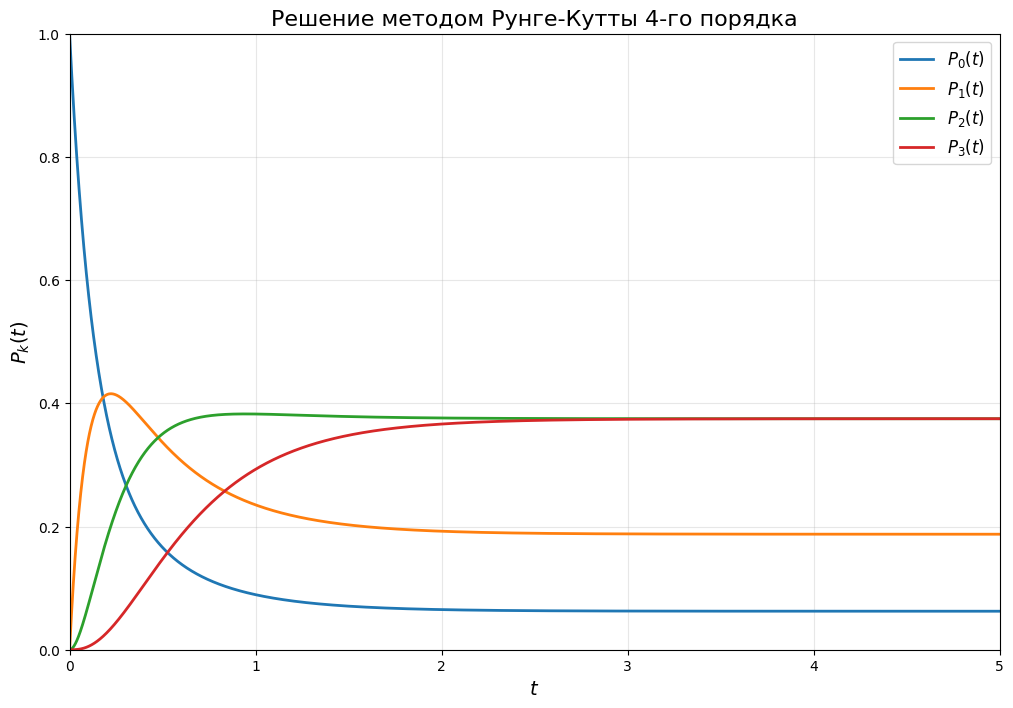

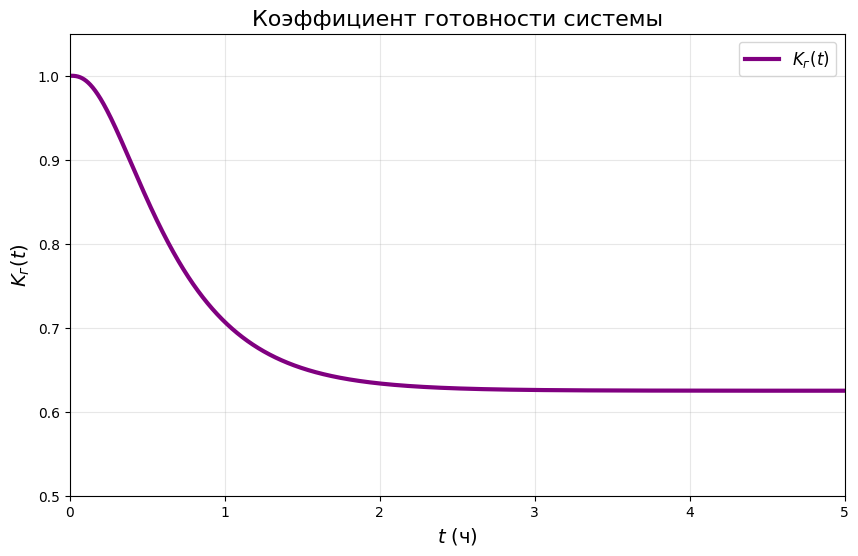

Время: 10.000 ч
Сумма вероятностей: 1.0000000000
  P0: 0.062500
  P1: 0.187500
  P2: 0.375000
  P3: 0.375000
  Kг: 0.625000


In [7]:
import numpy as np

# Матрица коэффициентов для нашей системы: λ=2, μ=2
A = np.array([
    [-6.0, 2.0, 0.0, 0.0],   # dP₀/dt
    [6.0, -6.0, 2.0, 0.0],   # dP₁/dt  
    [0.0, 4.0, -4.0, 2.0],   # dP₂/dt
    [0.0, 0.0, 2.0, -2.0]    # dP₃/dt
])

# Функция правой части системы: dP/dt = A @ P
def f(P):
    return A @ P  # не зависит от t

# Параметры метода
h = 0.001  # шаг времени
T = 10.0    # конечное время 
steps = int(T / h)

# Начальные условия: P₀(0)=1, остальные 0
P = np.array([1.0, 0.0, 0.0, 0.0])  # P(0)

# Массивы для хранения результатов
time_points = np.linspace(0, T, steps + 1)
P_history = np.zeros((steps + 1, 4))
P_history[0] = P

# Метод Рунге-Кутты 4-го порядка
for i in range(steps):
    k1 = f(P)
    k2 = f(P + 0.5 * h * k1)
    k3 = f(P + 0.5 * h * k2)
    k4 = f(P + h * k3)

    P = P + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    P_history[i + 1] = P

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for k in range(4):
    plt.plot(time_points, P_history[:, k], label=f"$P_{k}(t)$", linewidth=2)

plt.xlabel("$t$", fontsize=14)
plt.ylabel("$P_k(t)$", fontsize=14)
plt.title("Решение методом Рунге-Кутты 4-го порядка", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

K_history = P_history[:, 0] + P_history[:, 1] + P_history[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(time_points, K_history, 'purple', linewidth=3, label='$K_г(t)$')
plt.xlabel("$t$ (ч)", fontsize=14)
plt.ylabel("$K_г(t)$", fontsize=14)
plt.title("Коэффициент готовности системы", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(0.5, 1.05)
plt.show()

def get_snapshot(t_target):
    """Возвращает словарь значений P_k в момент t_target"""
    index = np.argmin(np.abs(time_points - t_target))
    snap = {
        "time": time_points[index],
        "P0": P_history[index, 0],
        "P1": P_history[index, 1],
        "P2": P_history[index, 2],
        "P3": P_history[index, 3],
        "K": P_history[index, 0] + P_history[index, 1] + P_history[index, 2]
    }
    print("="*50)
    print(f"Время: {snap['time']:.3f} ч")
    print(f"Сумма вероятностей: {np.sum(P_history[index]):.10f}")
    for k in range(4):
        print(f"  P{k}: {snap[f'P{k}']:.6f}")
    print(f"  Kг: {snap['K']:.6f}")

# get_snapshot(0)
# get_snapshot(0.5)
# get_snapshot(1.0)
# get_snapshot(2.0)
get_snapshot(10.0)